In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, os
import pickle
%matplotlib inline
working_directory = os.getcwd()

In [3]:
# import the encoded_df
encoded_df = pd.read_csv(working_directory + '/VAERSData/encoded_df.csv')
encoded_df.shape

(436116, 20)

- having set up the data, remeber that the K-nearest neighbor uses distance and hence requires scaled data.

In [19]:
encoded_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DIED,436116.0,0.015143,0.122121,0.0,0.0,0.0,0.0,1.0
L_THREAT,436116.0,0.018419,0.134463,0.0,0.0,0.0,0.0,1.0
HOSPITAL,436116.0,0.057418,0.232640,0.0,0.0,0.0,0.0,1.0
X_STAY,436116.0,0.000454,0.021303,0.0,0.0,0.0,0.0,1.0
DISABLE,436116.0,0.021279,0.144312,0.0,0.0,0.0,0.0,1.0
RECOVD,436116.0,0.487584,0.499846,0.0,0.0,0.0,1.0,1.0
ER_ED_VISIT,436116.0,0.126297,0.332184,0.0,0.0,0.0,0.0,1.0
ageGroup,436116.0,0.988858,1.060050,0.0,0.0,1.0,2.0,5.0
OTHER_MEDS_Not Specified,436116.0,0.289093,0.453342,0.0,0.0,0.0,1.0,1.0
OTHER_MEDS_RPTD,436116.0,0.560259,0.496356,0.0,0.0,1.0,1.0,1.0


- Observation: we see from the mean and the standard deviation that the values are on similar scale; between (0-1).
  otherwise we would have scaled the skewed values by using ex. MinMaxScaler

__K-Nearest Neighbors (KNN)__

>- Now that the data is encoded and scaled, seperate the features (X) from the target variable (y, Recovery).
>- split the data into training and testing samples, with test sample representing 20% of the obseravtion.
>- estimate a K-nearest neighbor model, using k= 3.
>- examine the Precision, Recall, F1 score, and accuracy of the classification.
>- use a graph to illustrate the confusion matrix.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [5]:
y, X = encoded_df['RECOVD'], encoded_df.drop(columns='RECOVD')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
# estimate KNN model and report outcomes (ca. 8 min)
knn = KNeighborsClassifier(n_neighbors= 3 )
knn = knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(classification_report(y_test, y_predict))
print('Accuracy_score:', round(accuracy_score(y_test, y_predict), 2))
print('f1_score:', round(f1_score(y_test, y_predict), 2))

              precision    recall  f1-score   support

           0       0.54      0.76      0.63     44759
           1       0.56      0.32      0.41     42465

    accuracy                           0.55     87224
   macro avg       0.55      0.54      0.52     87224
weighted avg       0.55      0.55      0.52     87224

Accuracy_score: 0.55
f1_score: 0.41


In [7]:
# estimate KNN model and report outcomes (ca. 8 min)
knn = KNeighborsClassifier(n_neighbors= 5 )
knn = knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(classification_report(y_test, y_predict))
print('Accuracy_score:', round(accuracy_score(y_test, y_predict), 2))
print('f1_score:', round(f1_score(y_test, y_predict), 2))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56     44759
           1       0.54      0.55      0.54     42465

    accuracy                           0.55     87224
   macro avg       0.55      0.55      0.55     87224
weighted avg       0.55      0.55      0.55     87224

Accuracy_score: 0.55
f1_score: 0.54


Text(0.5, 24.0, 'Prediction')

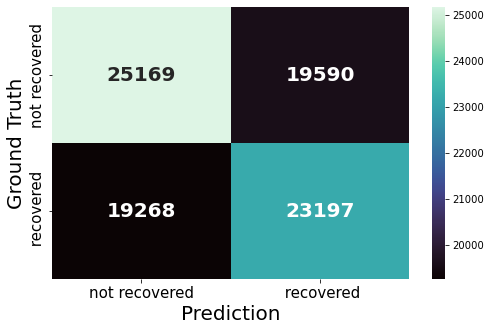

In [10]:
# plot confusion matrix
#sns.set_palette(sns.color_palette(colors))
_,ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='mako', annot_kws={'size':20, 'weight': 'bold'})
labels= ['not recovered', ' recovered']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)

__Right Value For K__
>- examine all values of k from 1 to 30
>- this time focus on F1, Error rate (1-Accuracy)
>- generate charts which plot each of these measures as a function of K


In [69]:
# run time: ca. 6 hr
max_k = 30
f1_scores = list()
error_rates = list()

for k in range (10, max_k):
    knn = KNeighborsClassifier(n_neighbors= k, weights='distance')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))

In [70]:
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [71]:
f1_results.sort_values(by= 'F1 Score', ascending=False)

,K,F1 Score
3,13,0.5842
7,17,0.5803
9,19,0.5782
5,15,0.5777
1,11,0.5745
8,18,0.5543
6,16,0.5440
4,14,0.5431
0,10,0.5376
2,12,0.5358


<Figure size 1800x1200 with 0 Axes>

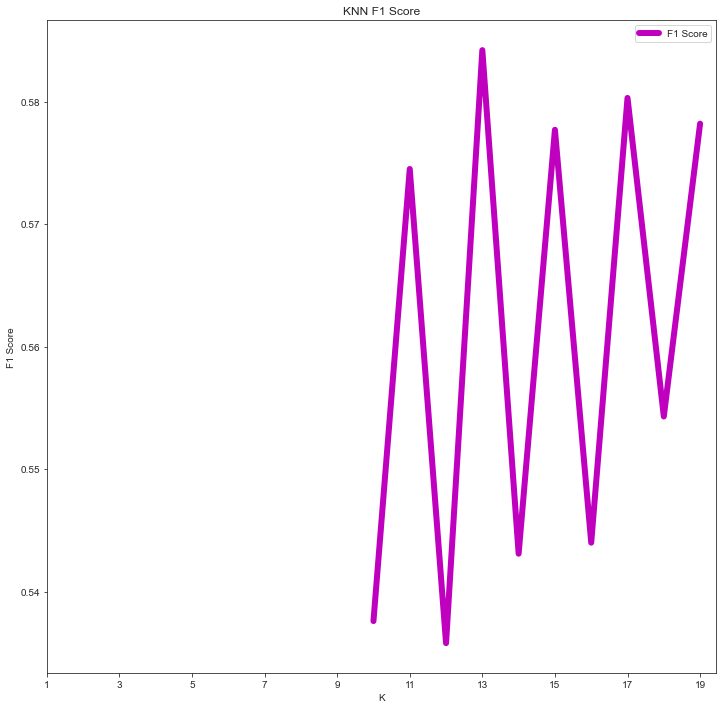

In [76]:
# Plot F1 results
sns.set_contact('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(color='m' ,figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

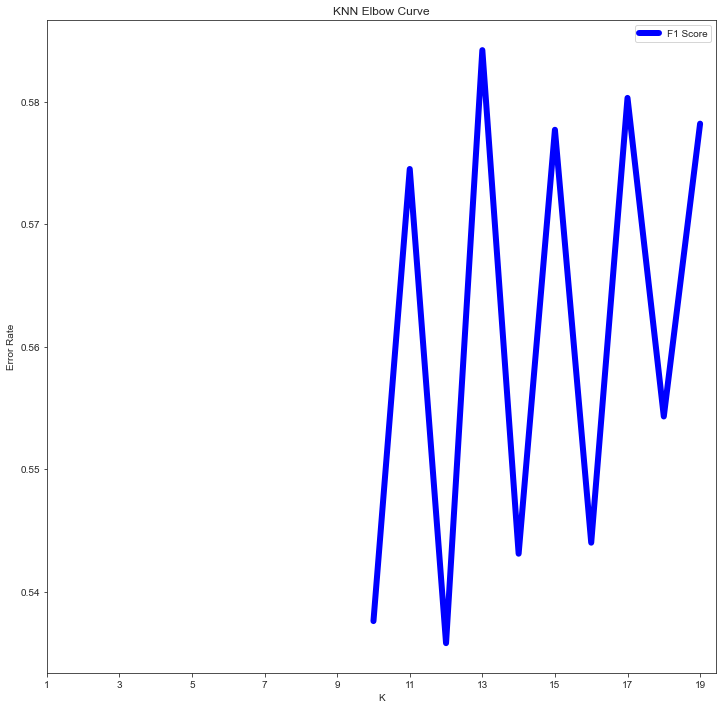

In [77]:
# Plot Accuracy (Error Rate) results
#sns.set_contact('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(color='b',figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN Elbow Curve')
plt.savefig('knn_f1.png')